In [1]:
#Black friday dataset EDA and feature engineering
#Cleaning and preparing the data for model training

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
df_train=pd.read_csv(r"C:\Users\amits\Downloads\archive (13)\train.csv")

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#  Problem Statement
 A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
 
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

 Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [5]:
df_train.shape

(550068, 12)

In [6]:
#importing the test data
df_test=pd.read_csv(r"C:\Users\amits\Downloads\archive (13)\test.csv")

In [7]:
df_test.shape

(233599, 11)

In [8]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
#merge both dataset

In [10]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [11]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
df.drop(['User_ID'],axis=1,inplace=True)

In [15]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [16]:
# pd.get_dummies(df['Gender'])

In [17]:
#Handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
#handling categorical feature age

In [20]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [21]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [23]:
#Fixing categorical citycategory
df_city=pd.get_dummies(df['City_Category'])

In [24]:
df_city.head()

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [25]:
df_city=pd.get_dummies(df['City_Category'])

In [26]:
df=pd.concat([df,df_city],axis=1)


In [27]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,False,True,False
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,False,True,False
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,False,True,False
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,False,False,True


In [28]:
df.drop('City_Category',axis=1,inplace=True)

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,False,True


In [30]:
#Missing Values

In [31]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [32]:
#Focus of replacing the missing values

In [33]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [34]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [35]:
#Replace the missing value with mode

In [36]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [37]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [38]:
df['Product_Category_2'].isnull().sum()

0

In [39]:
#Product_Category_3 replace missing value

In [40]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [41]:
df['Product_Category_3'].mode()[0]

16.0

In [42]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [43]:
df['Product_Category_3'].isnull().sum()

0

In [44]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,True,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,True,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,True,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,False,True


In [45]:
df.shape

(783667, 13)

In [46]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [47]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [48]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,True,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,True,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,True,False,False
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,False,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  bool   
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(3), fl

In [50]:
#convert object into int

In [51]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  bool   
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(3), fl

In [53]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  bool   
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: bool(1), fl

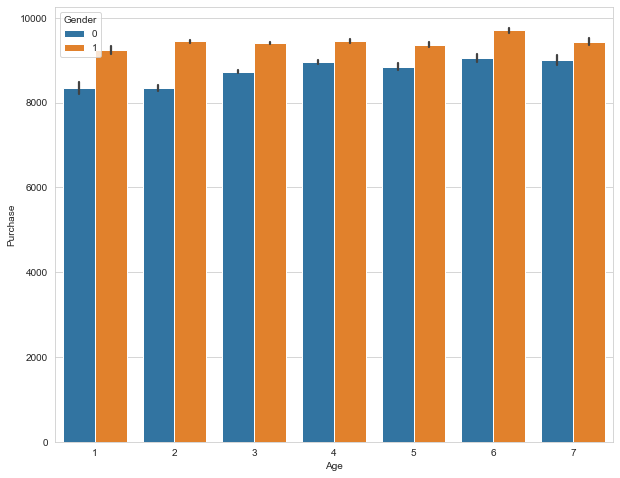

In [55]:
#visualisation
plt.figure(figsize=(10,8))
sns.barplot(x='Age',y='Purchase',hue='Gender', data=df)
plt.show()

observation:
1. Purchasing of men is higher than women

In [56]:
#visualization of purchase with occupation

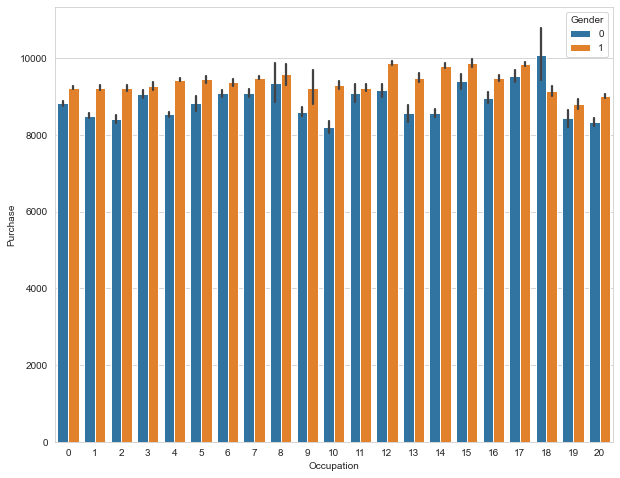

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x='Occupation',y='Purchase',hue="Gender",data=df)
plt.show()

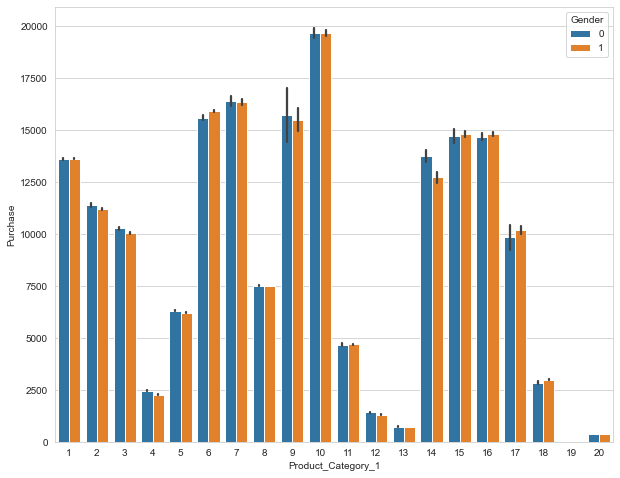

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product_Category_1',y='Purchase',hue="Gender",data=df)
plt.show()

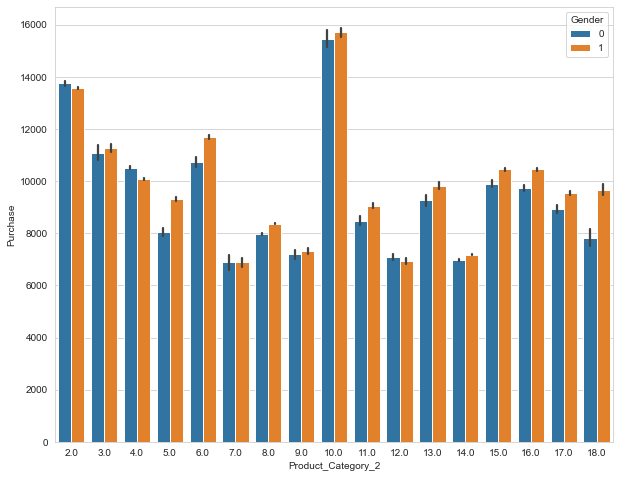

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product_Category_2',y='Purchase',hue="Gender",data=df)
plt.show()

In [60]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,True,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,True,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,True,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,0,1


In [61]:
#Feature Scaling

In [62]:
df_test=df[df['Purchase'].isnull()]

In [63]:
df_train=df[~df['Purchase'].isnull()]

In [64]:
#Feature scaling

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
y=df_train['Purchase']

In [67]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [68]:
x=df_train.iloc[:,df.columns!='Purchase']

In [69]:
x

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,True,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,True,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,True,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,True,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,False,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,False,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,False,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,False,0,1


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [71]:
x_train.shape

(385047, 12)

In [72]:
y_train.shape

(385047,)

In [73]:
x_test.shape

(165021, 12)

In [74]:
y_test.shape

(165021,)

In [75]:
#Feature Scaling

In [76]:
x_train.drop('Product_ID', inplace=True, axis=1)

In [77]:
x_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
500304,1,3,16,0,0,8,14.0,16.0,True,0,0
16861,1,3,1,2,1,16,8.0,16.0,False,1,0
113230,1,2,7,1,0,8,16.0,16.0,True,0,0
434978,1,3,0,1,0,1,16.0,16.0,True,0,0
385516,0,4,3,3,1,3,4.0,5.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...
110268,1,5,17,2,0,5,8.0,16.0,False,0,1
259178,1,3,14,2,1,5,8.0,16.0,False,0,1
365838,0,2,1,1,0,5,8.0,16.0,False,1,0
131932,0,2,4,2,0,8,14.0,16.0,False,1,0


In [78]:
x_test.drop('Product_ID', inplace=True, axis=1)

In [79]:
x_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
84432,1,6,19,3,0,1,2.0,16.0,False,0,1
72724,0,4,11,1,0,1,15.0,16.0,False,1,0
197032,0,4,0,2,1,8,15.0,16.0,True,0,0
353704,1,2,4,3,0,1,15.0,16.0,True,0,0
91198,1,2,4,0,0,6,8.0,16.0,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
284287,1,4,0,2,0,5,9.0,16.0,False,0,1
50876,1,3,20,1,0,8,16.0,16.0,False,0,1
533433,1,2,16,1,0,1,17.0,16.0,False,0,1
44339,1,2,4,1,0,2,5.0,15.0,False,1,0


In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [81]:
x_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
500304,1,3,16,0,0,8,14.0,16.0,True,0,0
16861,1,3,1,2,1,16,8.0,16.0,False,1,0
113230,1,2,7,1,0,8,16.0,16.0,True,0,0
434978,1,3,0,1,0,1,16.0,16.0,True,0,0
385516,0,4,3,3,1,3,4.0,5.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...
110268,1,5,17,2,0,5,8.0,16.0,False,0,1
259178,1,3,14,2,1,5,8.0,16.0,False,0,1
365838,0,2,1,1,0,5,8.0,16.0,False,1,0
131932,0,2,4,2,0,8,14.0,16.0,False,1,0


In [82]:
x_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
84432,1,6,19,3,0,1,2.0,16.0,False,0,1
72724,0,4,11,1,0,1,15.0,16.0,False,1,0
197032,0,4,0,2,1,8,15.0,16.0,True,0,0
353704,1,2,4,3,0,1,15.0,16.0,True,0,0
91198,1,2,4,0,0,6,8.0,16.0,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
284287,1,4,0,2,0,5,9.0,16.0,False,0,1
50876,1,3,20,1,0,8,16.0,16.0,False,0,1
533433,1,2,16,1,0,1,17.0,16.0,False,0,1
44339,1,2,4,1,0,2,5.0,15.0,False,1,0


In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [126]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.12927312161447535

C:\Users\amits\AppData\Local\Temp/ipykernel_84/23514526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color="black", label= "actual_value")
C:\Users\amits\AppData\Local\Temp/ipykernel_84/23514526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, color="blue", label = "Pre

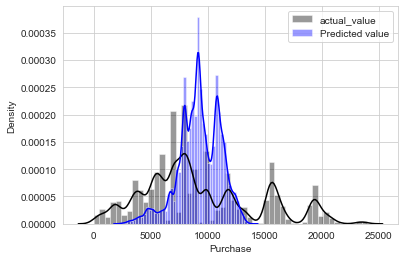

In [127]:
sns.distplot(y_test, color="black", label= "actual_value")
sns.distplot(y_pred, color="blue", label = "Predicted value")
plt.legend()
plt.show()

In [86]:
from sklearn.linear_model import RidgeCV

In [87]:
ridgecv=RidgeCV(cv=8)

In [88]:
ridgecv.fit(x_train, y_train)

RidgeCV(cv=8)

In [89]:
y_pred=ridgecv.predict(x_test)

In [90]:
score=r2_score(y_test,y_pred)
score

0.12927308008708482

In [91]:
from sklearn.linear_model import LassoCV
alphas = [0.001, 0.01, 0.1, 1.0, 10]
lassocv = LassoCV(cv=5)
lassocv.fit(x_train, y_train)

LassoCV(cv=5)

In [92]:
lassocv.alpha_

6.828956275345171

In [123]:
y_pred = lassocv.predict(x_test)
r2_score(y_pred , y_test)

-5.6220045576100075

C:\Users\amits\AppData\Local\Temp/ipykernel_84/23514526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color="black", label= "actual_value")
C:\Users\amits\AppData\Local\Temp/ipykernel_84/23514526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, color="blue", label = "Pre

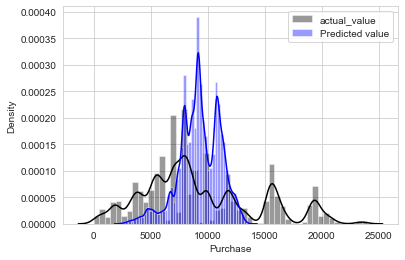

In [124]:
sns.distplot(y_test, color="black", label= "actual_value")
sns.distplot(y_pred, color="blue", label = "Predicted value")
plt.legend()
plt.show()

In [95]:
from xgboost import XGBRegressor

In [106]:
xgr = XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 1000],
    "max_depth" : [2,4 ,6,8,10,15,20],
    "max_leaves" : [3,5,8,10,13,16, 18, 20],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0]
}

grid_search = RandomizedSearchCV(xgr, param_grid, n_jobs=-1, verbose = 1, cv=5)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\am

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          1.0],
                                        'max_depth': [2, 4, 6, 8, 10, 15, 20],
                                        'max_leaves': [3, 5, 8, 10, 13, 16, 18,
                                                       20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         1000]},
                   verbose=1)

In [107]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=16,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [108]:
xgr = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=16,
             min_child_weight=None,  monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)

In [120]:
xgr.fit(x_train, y_train)
y_pred = xgr.predict(x_test)

C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\am

In [121]:
r2_score(y_test, y_pred)

0.659761694319005

C:\Users\amits\AppData\Local\Temp/ipykernel_84/23514526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color="black", label= "actual_value")
C:\Users\amits\AppData\Local\Temp/ipykernel_84/23514526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, color="blue", label = "Pre

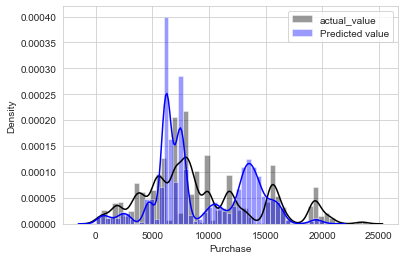

In [122]:
sns.distplot(y_test, color="black", label= "actual_value")
sns.distplot(y_pred, color="blue", label = "Predicted value")
plt.legend()
plt.show()